In [3]:
import pickle
import os

path = os.path.join('..', 'data', 'story', 'smoothedTrajectoriesDifferentWindowSizes')

os.listdir(path)

['smoothTrajRawIntensityMean_win10.pkl',
 'smoothTrajRawIntensityMean_win100.pkl',
 'smoothTrajRawIntensityMean_win20.pkl',
 'smoothTrajRawIntensityMean_win200.pkl',
 'smoothTrajRawIntensityMean_win50.pkl',
 'smoothTrajRawIntensityMean_win500.pkl',
 'smoothTrajRawValenceMean_win10.pkl',
 'smoothTrajRawValenceMean_win100.pkl',
 'smoothTrajRawValenceMean_win20.pkl',
 'smoothTrajRawValenceMean_win200.pkl',
 'smoothTrajRawValenceMean_win50.pkl',
 'smoothTrajRawValenceMean_win500.pkl']

In [10]:
trajectory = pickle.load(open('smoothTrajRawValenceMean_win200.pkl', "r"))

FileNotFoundError: [Errno 2] No such file or directory: 'smoothTrajRawValenceMean_win200.pkl'

In [57]:
file = open("..\\data\\story\\smoothedTrajectoriesDifferentWindowSizes\\smoothTrajRawValenceMean_win50.pkl", "rb")

In [58]:
trajectory = pickle.load(file)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xb3 in position 10: ordinal not in range(128)

In [63]:
import pickle
import gzip
import numpy


#http://stackoverflow.com/questions/11305790/pickle-incompatability-of-numpy-arrays-between-python-2-and-3
with open('..\\data\\story\\smoothedTrajectoriesDifferentWindowSizes\\smoothTrajRawValenceMean_win200.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    print(p)

print(p.shape)

R = 3

[ 0.         -0.00311721 -0.00623443 ..., -0.39441291 -0.3984754
 -0.40253789]
(5176,)


In [70]:
from scipy.signal import resample

resampled_value = resample(p, 10)
resampled_value

array([-1.74647268,  3.38734096, -0.01874347,  1.53804844,  2.1983195 ,
        6.93263581,  1.51421877,  1.95468042,  1.69353899, -0.55050142])

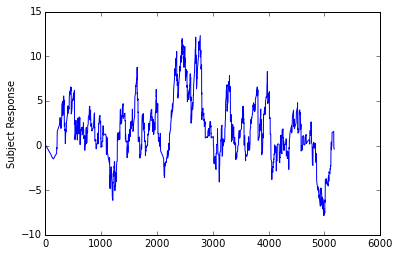

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(p)
plt.ylabel('Subject Response')
plt.show()

In [77]:
import scipy.io

s3 = scipy.io.loadmat('..\\data\\plosone\\subject_3.mat', squeeze_me=True)
s3['words']

array([('Harry', 20, 0.5), ('had', 20.5, 0.5), ('never', 21, 0.5), ...,
       ('thirteen', 2692, 0.5), ('was.', 2692.5, 0.5), ('+', 2693, 9)], 
      dtype=[('text', 'O'), ('start', 'O'), ('length', 'O')])

In [78]:
#get the first element
s3['words'][0]

('Harry', 20, 0.5)

In [80]:
#get the time from the tuple
s3['words'][0][1]

20

In [88]:
sample_per_second = 0.5
first_time = s3['words'][0][1]

skipped_samples = int(first_time * sample_per_second)

skipped_samples

10

In [89]:
#get the length
len(s3['words'])

5176

In [91]:
s3['words'][len(s3['words'])-1]

('+', 2693, 9)

In [127]:
last_word_time_start = s3['words'][len(s3['words'])-1][1]
last_word_duration = s3['words'][len(s3['words'])-1][2]
story_ending = int(last_word_time_start + last_word_duration)
story_ending

2702

In [128]:
#store the number of samples from the dataset
number_of_samples = 1351
number_of_samples

1351

In [129]:
total_samples_time = int(number_of_samples / sample_per_second)
total_samples_time

2702

In [130]:
#work out new number of valid samples
new_total_sample_time = total_samples_time - skipped_samples
new_total_sample_time

2692

In [131]:
#get the number of samples
total_interesting_samples = int(new_total_sample_time * sample_per_second)
total_interesting_samples

1346

In [132]:
#resample array
resampled_value = resample(p, total_interesting_samples)
resampled_value

array([-0.1398198 ,  0.01426231, -0.03339486, ...,  1.47696292,
       -0.07964283, -0.39637233])

In [133]:
len(resampled_value)

1346

In [134]:
s3['words'][-10:]

array([('little', 2688.5, 0.5), ('package', 2689, 0.5),
       ('from', 2689.5, 0.5), ('vault', 2690, 0.5), ('seven', 2690.5, 0.5),
       ('hundred', 2691, 0.5), ('and', 2691.5, 0.5),
       ('thirteen', 2692, 0.5), ('was.', 2692.5, 0.5), ('+', 2693, 9)], 
      dtype=[('text', 'O'), ('start', 'O'), ('length', 'O')])

In [140]:
num = 0
for value in s3['words']:
    if value[2] > num:
        num = value[2]
    if value[2] > 0.5:
        print(value)
num

('+', 671, 9)
('+', 1375, 9)
('+', 1933, 9)
('+', 2693, 9)


9